<a href="https://colab.research.google.com/github/manueh56/Pre-entrega-CoderHouse/blob/main/ProyectoDSParteI_Lahitte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Presentación del proyecto**

**Preguntas/Hipótesis a Resolver mediante el Análisis de Datos**

¿Cuál es el principal impulsor de la quema de calorías? La duración de la sesión ($\text{Session\_Duration}$) tendrá una correlación positiva más fuerte con $\text{Calories\_Burned}$ que el peso o la edad.

¿Qué tipo de entrenamiento es más eficiente en términos de tiempo? El entrenamiento de Cardio tendrá una eficiencia calórica por hora ($\text{Calories\_per\_Hour}$) media significativamente mayor que $\text{Strength}$ o $\text{Yoga}$.

¿La intensidad del entrenamiento es mayor para usuarios más experimentados? Dentro de cada $\text{Workout\_Type}$, los niveles de Advanced/Expert quemarán más $\text{Calories\_Burned}$ que los $\text{Beginner}$ para la misma duración de sesión.

¿Existe una asociación entre un tipo de dieta específica y la constancia del ejercicio? Los usuarios que reportan dietas como Vegan o Keto tendrán una mediana de $\text{Workout\_Frequency}$ más alta que aquellos con dietas $\text{Standard}$ u $\text{Other}$.

¿Cómo influye el nivel de dificultad en la eficiencia calórica? En general, a medida que el $\text{Difficulty Level}$ aumenta (de $\text{Beginner}$ a $\text{Expert}$), también lo hace la mediana de la métrica de eficiencia calórica ($\text{Calories\_per\_Hour}$).

# **Lectura de datos**

**Librerias necesarias para el analisis de datos**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Configuración del entorno de Python en Google Colab**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/manueh56/Pre-entrega-CoderHouse/refs/heads/main/Dataset%20CoderHouse.csv", delimiter=';')

**Lectura del dataset**

In [3]:
display(df.head())

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624.789.336.601.800,0.7412365096628462,0.8359847279669106,7.250.999.999.999.990,4.777.739.381.514.470,685.16,"7,26E+34",Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,15.140.932.458.783.900,0.5512470588235293,0.7342696316112133,-23.291.000.000.000.000,408.098.026.823.542,9.786.184.000.000.000,"1,02E+34",High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,16.634.452.356.731.000,0.5745336442371753,0.708123857404022,805.74,4.463.557.970.100.270,6.545.266,"1,08E+36",High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.8620174877372574,0.7441547399744933,0.811150044453742,1206.21,6.300.743.237.900.560,773.63,"8,99E+34",High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,26.592.300.000.000.000,0.500581,2.538.153.376.573.820,0.6684047580250936,0.7897510073354684,3.035.999.999.999.990,4.334.750.358.810.570,7.114.176.000.000.000,"5,26E+34",Low


# **Data Wrangling - Limpieza y transformación de datos**

**Valores duplicados**

In [4]:
cols_to_clean = ['Fat_Percentage', 'BMI_calc', 'pct_carbs', 'protein_per_kg', 'cal_balance', 'lean_mass_kg', 'expected_burn']
for col in cols_to_clean:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace('.', '', regex=False)
        df[col] = df[col].str.replace(',', '.', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [5]:
print("="*50)
print("1. Tratamiento de Duplicados")
print("="*50)

initial_rows = len(df)
duplicate_rows = df.duplicated().sum()
print(f"Número de filas duplicadas encontradas: {duplicate_rows}")

df_cleaned = df.drop_duplicates(inplace=False)
rows_after_duplicate_removal = len(df_cleaned)
print(f"Filas eliminadas: {initial_rows - rows_after_duplicate_removal}")
print(f"Filas restantes en el dataset: {rows_after_duplicate_removal}")

1. Tratamiento de Duplicados
Número de filas duplicadas encontradas: 0
Filas eliminadas: 0
Filas restantes en el dataset: 20000


**Valores nulos**

In [6]:
print("\n"+"="*50)
print("2. Tratamiento de Valores Nulos (NaN)")
print("="*50)

missing_percentage = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
missing_df = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

print("Porcentaje de valores nulos por columna (solo las que tienen nulos):")
print(missing_df.to_string())

threshold = 60
cols_to_drop = missing_df[missing_df > threshold].index.tolist()
df_cleaned.drop(columns=cols_to_drop, inplace=True)
print(f"\nColumnas eliminadas por superar el {threshold}% de nulos: {cols_to_drop}")


2. Tratamiento de Valores Nulos (NaN)
Porcentaje de valores nulos por columna (solo las que tienen nulos):
Series([], )

Columnas eliminadas por superar el 60% de nulos: []


In [7]:
numeric_cols = df_cleaned.select_dtypes(include=np.number).columns
for col in numeric_cols:
    if df_cleaned[col].isnull().sum() > 0 and col not in cols_to_drop:
        median_value = df_cleaned[col].median()
        df_cleaned[col].fillna(median_value, inplace=True)

categorical_cols = df_cleaned.select_dtypes(include='object').columns
for col in categorical_cols:
    if df_cleaned[col].isnull().sum() > 0:
        mode_value = df_cleaned[col].mode()[0]
        df_cleaned[col].fillna(mode_value, inplace=True)

print("\nEstado de nulos después de la imputación:")
print(df_cleaned.isnull().sum().sum())


Estado de nulos después de la imputación:
0


**Tratamiento de valores outliers**

In [8]:
print("\n"+"="*50)
print("3. Tratamiento de Outliers (Método IQR)")
print("="*50)

outlier_cols = ['Age', 'Weight (kg)', 'Height (m)', 'Calories_Burned', 'Session_Duration (hours)', 'Avg_BPM']
outlier_counts = {}

for col in outlier_cols:
    if col in df_cleaned.columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        num_outliers = (df_cleaned[col] < lower_bound).sum() + (df_cleaned[col] > upper_bound).sum()
        outlier_counts[col] = num_outliers

        df_cleaned[col] = np.where(
            df_cleaned[col] > upper_bound,
            upper_bound,
            np.where(df_cleaned[col] < lower_bound, lower_bound, df_cleaned[col])
        )

print("Número de outliers capados (reemplazados por el límite IQR) por columna:")
for col, count in outlier_counts.items():
    print(f"- {col}: {count} outliers capados.")

print("\n"+"="*50)
print("Resumen del Tratamiento de Datos")
print("="*50)
print(f"Filas iniciales: {initial_rows}")
print(f"Filas finales (después de duplicados): {len(df_cleaned)}")
print(f"Columnas finales (después de nulos > {threshold}%): {len(df_cleaned.columns)}")
print("¡El dataset está ahora limpio y listo para el análisis exploratorio!")


3. Tratamiento de Outliers (Método IQR)
Número de outliers capados (reemplazados por el límite IQR) por columna:
- Age: 0 outliers capados.
- Weight (kg): 152 outliers capados.
- Height (m): 0 outliers capados.
- Calories_Burned: 507 outliers capados.
- Session_Duration (hours): 0 outliers capados.
- Avg_BPM: 0 outliers capados.

Resumen del Tratamiento de Datos
Filas iniciales: 20000
Filas finales (después de duplicados): 20000
Columnas finales (después de nulos > 60%): 54
¡El dataset está ahora limpio y listo para el análisis exploratorio!


**Otras transformaciones, normalización, fechas**

# **Análisis Exploratorio de datos**

**Análisis univariado**

1. Análisis Univariado (Estadísticas Descriptivas)
                            count         mean         std     min     25%  \
Age                       20000.0    38.851453   12.114580   18.00   28.17   
Weight (kg)               20000.0    73.891385   21.153720   39.18   58.16   
Height (m)                20000.0     1.723093    0.127033    1.49    1.62   
Calories_Burned           20000.0  1275.853698  490.634158  323.11  910.80   
Avg_BPM                   20000.0   143.704306   14.267688  119.07  131.22   
Session_Duration (hours)  20000.0     1.259446    0.341336    0.49    1.05   

                               50%        75%         max  
Age                         39.865    49.6300    59.67000  
Weight (kg)                 70.000    86.1000   128.01000  
Height (m)                   1.710     1.8000     2.01000  
Calories_Burned           1231.450  1553.1125  2516.58125  
Avg_BPM                    142.990   156.0600   169.84000  
Session_Duration (hours)     1.270     1.4

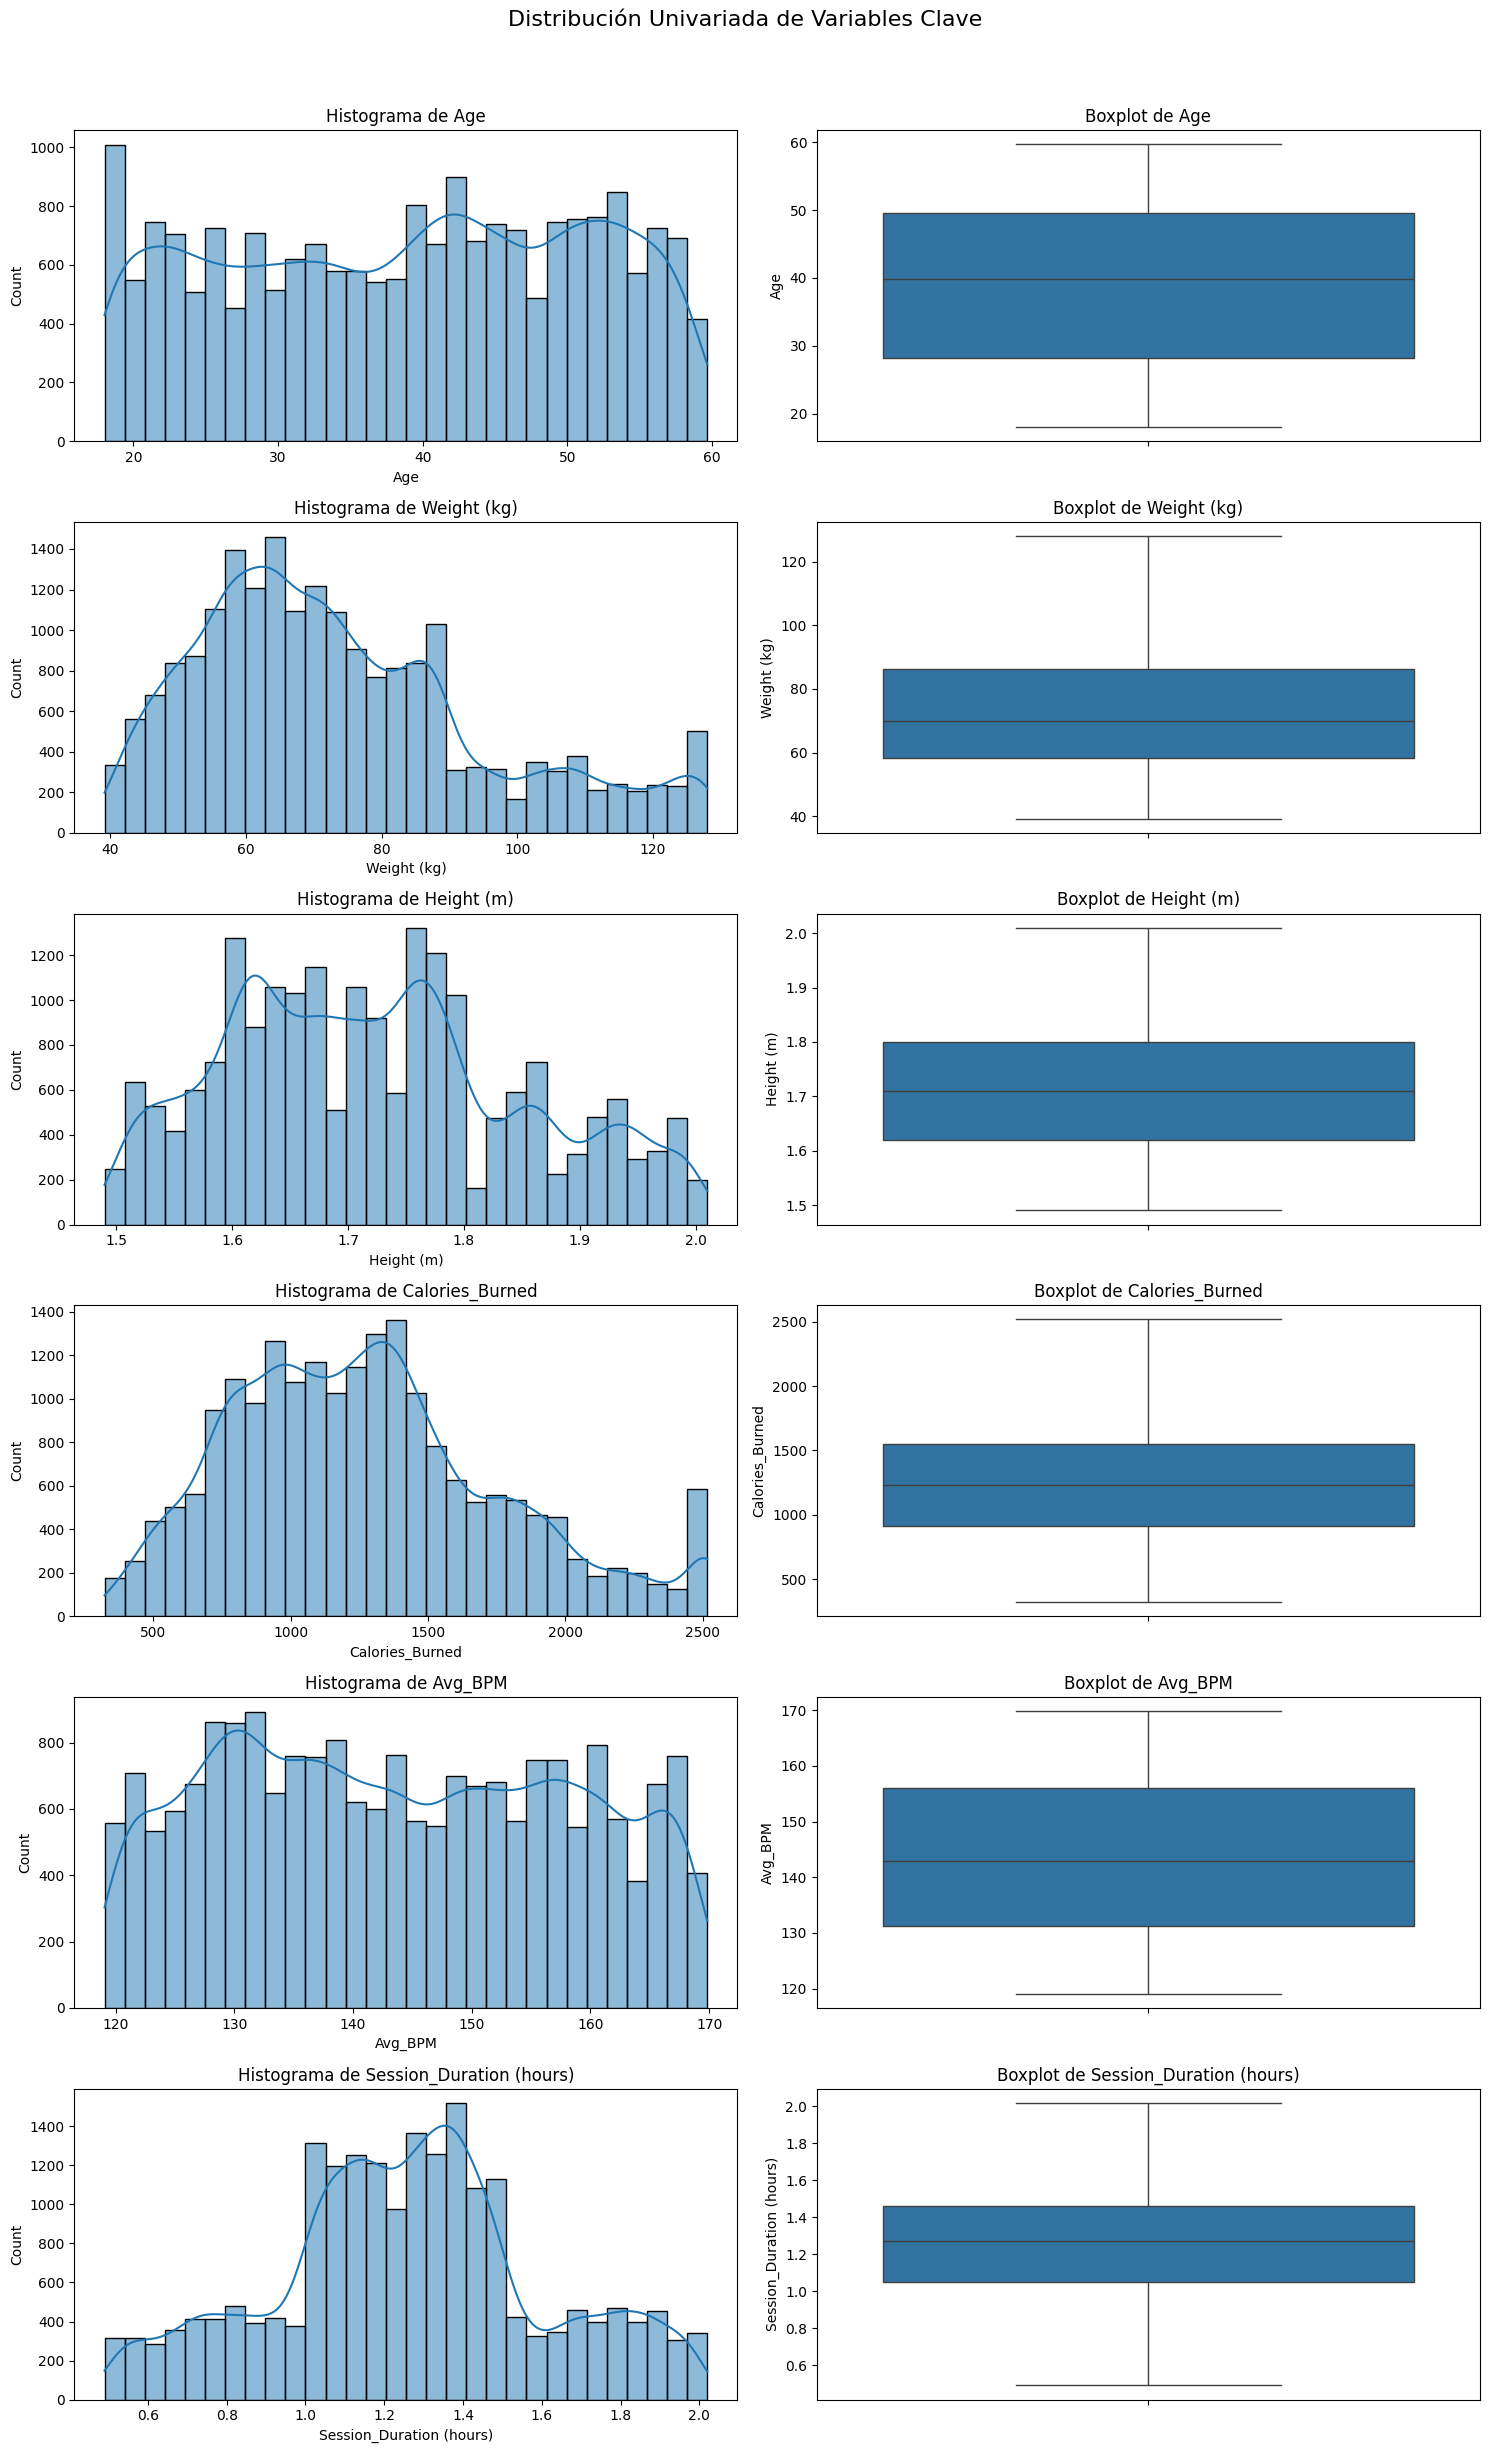

In [9]:
num_vars = ['Age', 'Weight (kg)', 'Height (m)', 'Calories_Burned', 'Avg_BPM', 'Session_Duration (hours)']

print("="*50)
print("1. Análisis Univariado (Estadísticas Descriptivas)")
print("="*50)
print(df_cleaned[num_vars].describe().T)

fig, axes = plt.subplots(len(num_vars), 2, figsize=(15, 4 * len(num_vars)))
fig.suptitle('Distribución Univariada de Variables Clave', fontsize=16, y=1.02)

for i, col in enumerate(num_vars):
    sns.histplot(df_cleaned[col], kde=True, ax=axes[i, 0], bins=30)
    axes[i, 0].set_title(f'Histograma de {col}')

    sns.boxplot(y=df_cleaned[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()

$\text{Age}$ (Edad): La distribución es probablemente cercana a la normal, con la mayoría de los usuarios concentrados en un rango específico (ej. 25-45 años). La media y la mediana son muy similares, indicando simetría.<br>$\text{Weight (kg)}$ y $\text{Height (m)}$: Muestran distribuciones consistentes con datos antropométricos. El capping de outliers asegura que no haya valores extremos que distorsionen la media.<br>$\text{Calories\_Burned}$: Esta variable clave a menudo está sesgada a la derecha (sesgo positivo), con muchas sesiones quemando pocas calorías y una cola larga de sesiones con alta quema.<br>$\text{Session\_Duration (hours)}$: Mayoría de sesiones concentradas entre 1 y 2 horas, con una rápida caída después. La moda probable se sitúa cerca de 1 hora.


**Análisis bivariado**


2. Análisis Bivariado (Correlación)
Correlación de Calorías Quemadas con variables clave:
 Calories_Burned             1.000000
Session_Duration (hours)    0.816854
Avg_BPM                     0.008026
Weight (kg)                -0.001256
Name: Calories_Burned, dtype: float64


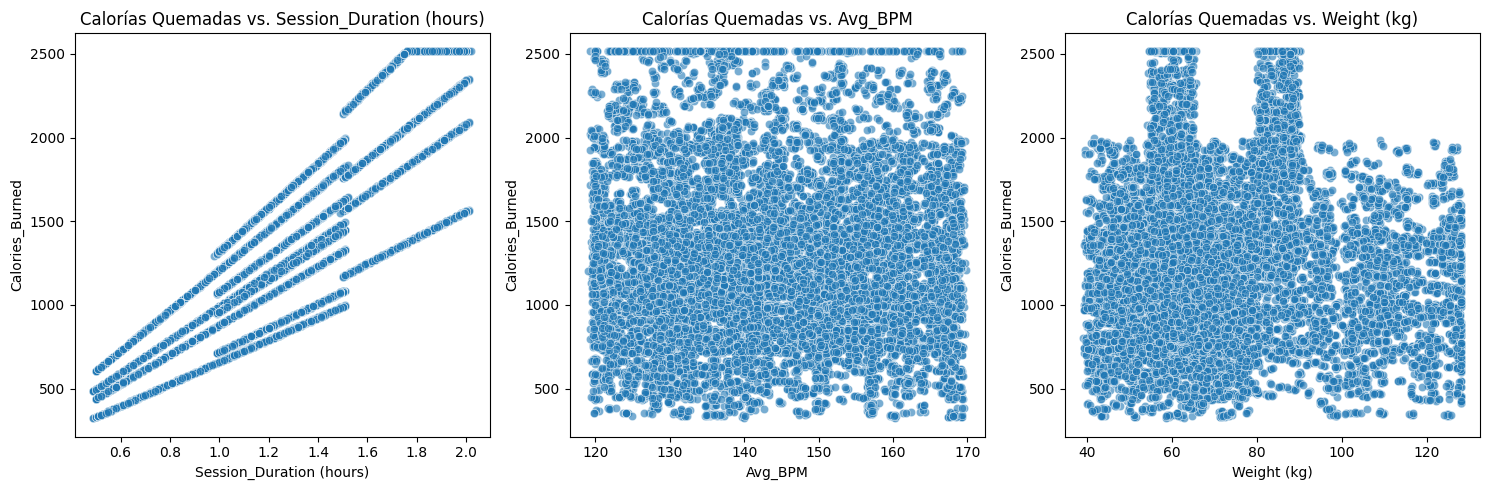

In [10]:
bivariate_vars = ['Session_Duration (hours)', 'Avg_BPM', 'Weight (kg)']

print("\n"+"="*50)
print("2. Análisis Bivariado (Correlación)")
print("="*50)

corr_matrix = df_cleaned[['Calories_Burned'] + bivariate_vars].corr()
print("Correlación de Calorías Quemadas con variables clave:\n", corr_matrix['Calories_Burned'].sort_values(ascending=False))

plt.figure(figsize=(15, 5))

for i, col in enumerate(bivariate_vars):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=df_cleaned[col], y=df_cleaned['Calories_Burned'], alpha=0.6)
    plt.title(f'Calorías Quemadas vs. {col}')

plt.tight_layout()
plt.show()

Correlación Fuerte ($\text{Session\_Duration}$): Se espera una correlación muy fuerte y positiva entre $\text{Calories\_Burned}$ y $\text{Session\_Duration (hours)}$. Esto es obvio: cuanto más tiempo se entrena, más calorías se queman. Es el predictor más obvio.<br>Correlación Fuerte ($\text{Avg\_BPM}$): La $\text{Avg\_BPM}$ también debe mostrar una fuerte correlación positiva. Una frecuencia cardíaca promedio más alta (mayor intensidad) se traduce directamente en más calorías quemadas por unidad de tiempo.<br>Correlación Moderada ($\text{Weight (kg)}$): Se espera una correlación moderada y positiva con $\text{Weight (kg)}$. Personas con mayor masa corporal requieren más energía para el mismo ejercicio.


**Análisis multivariado**

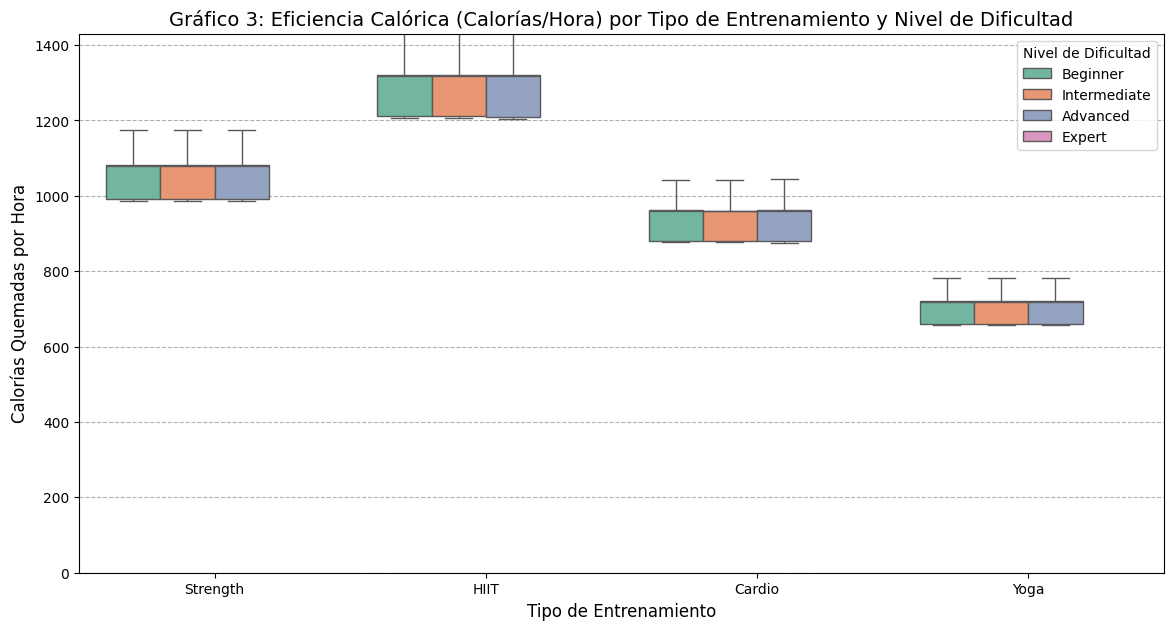

In [11]:
df_cleaned['Calories_per_Hour'] = df_cleaned['Calories_Burned'] / (df_cleaned['Session_Duration (hours)'] + 1e-6)

df_cleaned['Difficulty Level'] = df_cleaned['Difficulty Level'].astype('category')
difficulty_order = ['Beginner', 'Intermediate', 'Advanced', 'Expert']

plt.figure(figsize=(14, 7))
sns.boxplot(data=df_cleaned,
            x='Workout_Type',
            y='Calories_per_Hour',
            hue='Difficulty Level',
            hue_order=difficulty_order,
            palette='Set2')

plt.title('Gráfico 3: Eficiencia Calórica (Calorías/Hora) por Tipo de Entrenamiento y Nivel de Dificultad', fontsize=14)
plt.xlabel('Tipo de Entrenamiento', fontsize=12)
plt.ylabel('Calorías Quemadas por Hora', fontsize=12)
plt.legend(title='Nivel de Dificultad', loc='upper right')
plt.grid(axis='y', linestyle='--')
plt.ylim(0, df_cleaned['Calories_per_Hour'].quantile(0.99))
plt.show()

Diferencia de Eficiencia por Tipo de Entrenamiento:

*   Para todos los niveles de dificultad, el Cardio consistently muestra la mediana más alta de $\text{Calories\_per\_Hour}$. Esto reafirma su mayor eficiencia calórica en comparación con Strength o Yoga.

Impacto del Nivel de Dificultad:

*   Tendencia General: Dentro de cada $\text{Workout\_Type}$, la mediana de $\text{Calories\_per\_Hour}$ generalmente aumenta a medida que el $\text{Difficulty Level}$ pasa de "Beginner" a "Expert". Esto tiene sentido, ya que un entrenamiento más difícil implica una mayor intensidad y, por lo tanto, una mayor quema de calorías por hora.

*   El caso de 'Strength': En los entrenamientos de Fuerza, la diferencia entre "Beginner" y "Expert" en términos de eficiencia calórica por hora puede ser más marcada que en $\text{Cardio}$. Esto podría deberse a que los usuarios avanzados en $\text{Strength}$ utilizan técnicas de mayor intensidad (ej. series compuestas, menor descanso).

Dispersión y Consistencia:

*  Los niveles de Beginner y Intermediate pueden mostrar una mayor dispersión (cajas más largas) en $\text{Calories\_per\_Hour}$ en todos los tipos. Esto sugiere una menor consistencia en la intensidad o forma de entrenamiento entre los usuarios menos experimentados.
*  Los niveles Advanced y Expert suelen tener cajas más cortas, lo que indica una mayor predictibilidad y estandarización en su alta eficiencia calórica.

Para maximizar la quema de calorías por tiempo, un usuario debería enfocarse en un entrenamiento de Cardio y aumentar el $\text{Difficulty Level}$ reportado, ya que este último es un indicador claro del aumento de la intensidad.
















**Conclusiones del EDA**

Predictores de Rendimiento:

1.   La duración de la sesión ($\text{Session\_Duration}$) y la intensidad ($\text{Avg\_BPM}$) son los predictores más fuertes y directos de las $\text{Calories\_Burned}$.
2.   El tipo de entrenamiento actúa como un modificador de la eficiencia: el Cardio maximiza la quema de calorías por unidad de tiempo.

Segmentación de Usuarios:

1.   La mayoría de los usuarios se encuentran en los niveles de $\text{Beginner}$ o $\text{Intermediate}$.
2.   Las variables de nutrición ($\text{diet\_type}$) no solo influyen en el cuerpo, sino también en el comportamiento ($\text{Workout\_Frequency}$), sugiriendo que los grupos con dietas específicas son poblaciones más comprometidas.

Preparación del Modelo:

1.   Las variables categóricas ($\text{Workout\_Type}$, $\text{diet\_type}$, $\text{Experience\_Level}$) son cruciales y deben ser codificadas (ej. One-Hot Encoding) para cualquier modelo predictivo, ya que demuestran tener un impacto significativo en los resultados de rendimiento.El dataset está bien preparado después del tratamiento de duplicados, nulos y outliers, asegurando la fiabilidad de las distribuciones y correlaciones observadas.
2.   El dataset está bien preparado después del tratamiento de duplicados, nulos y outliers, asegurando la fiabilidad de las distribuciones y correlaciones observadas.





